the data

In [23]:
x_data = [1.0, 2.0, 2.8, 3.8, 4.6, 5.4, 6.4, 6.8]
y_data = [-4.210, -7.798, -9.664, -9.790, -7.410, -2.125, 9.691, 16.373]

points = list(zip(x_data, y_data))

lagrange interpolation

In [24]:
def lagrange_interpolation(x_values, y_values):
    def polynomial(x):
        total = 0
        n = len(x_values)
        for i in range(n):
            xi, yi = x_values[i], y_values[i]

            def g(i, n):
                tot_mul = 1
                for j in range(n):
                    if i != j:
                        xj = x_values[j]
                        tot_mul *= (x - xj) / (xi - xj)
                return tot_mul
            
            total += yi * g(i, n)
        return total
    return polynomial

product function

In [25]:
def prod(x, x_k):
    result = 1
    for k in x_k:
        result *= (x - k)
    return result

remainder term function

In [26]:
def remainder(x, x_list):
    return abs(prod(x, x_list))

create all permutations

In [27]:
import itertools

all_permutations = []
for r in range(2, 7):
    for perm in itertools.permutations(points, r):
        all_permutations.append(perm)

create all lagrange interpolations and rate them using P criterion

In [28]:
grouped_tuples = {}
for t in all_permutations:
    length = len(t)
    if length not in grouped_tuples:
        grouped_tuples[length] = []
    grouped_tuples[length].append(t)


(2.0, 6.4)
(1.0, 3.8, 6.4)
(1.0, 2.8, 6.4, 5.4)
(1.0, 2.8, 3.8, 5.4, 6.8)
(1.0, 2.0, 3.8, 4.6, 6.4, 6.8)


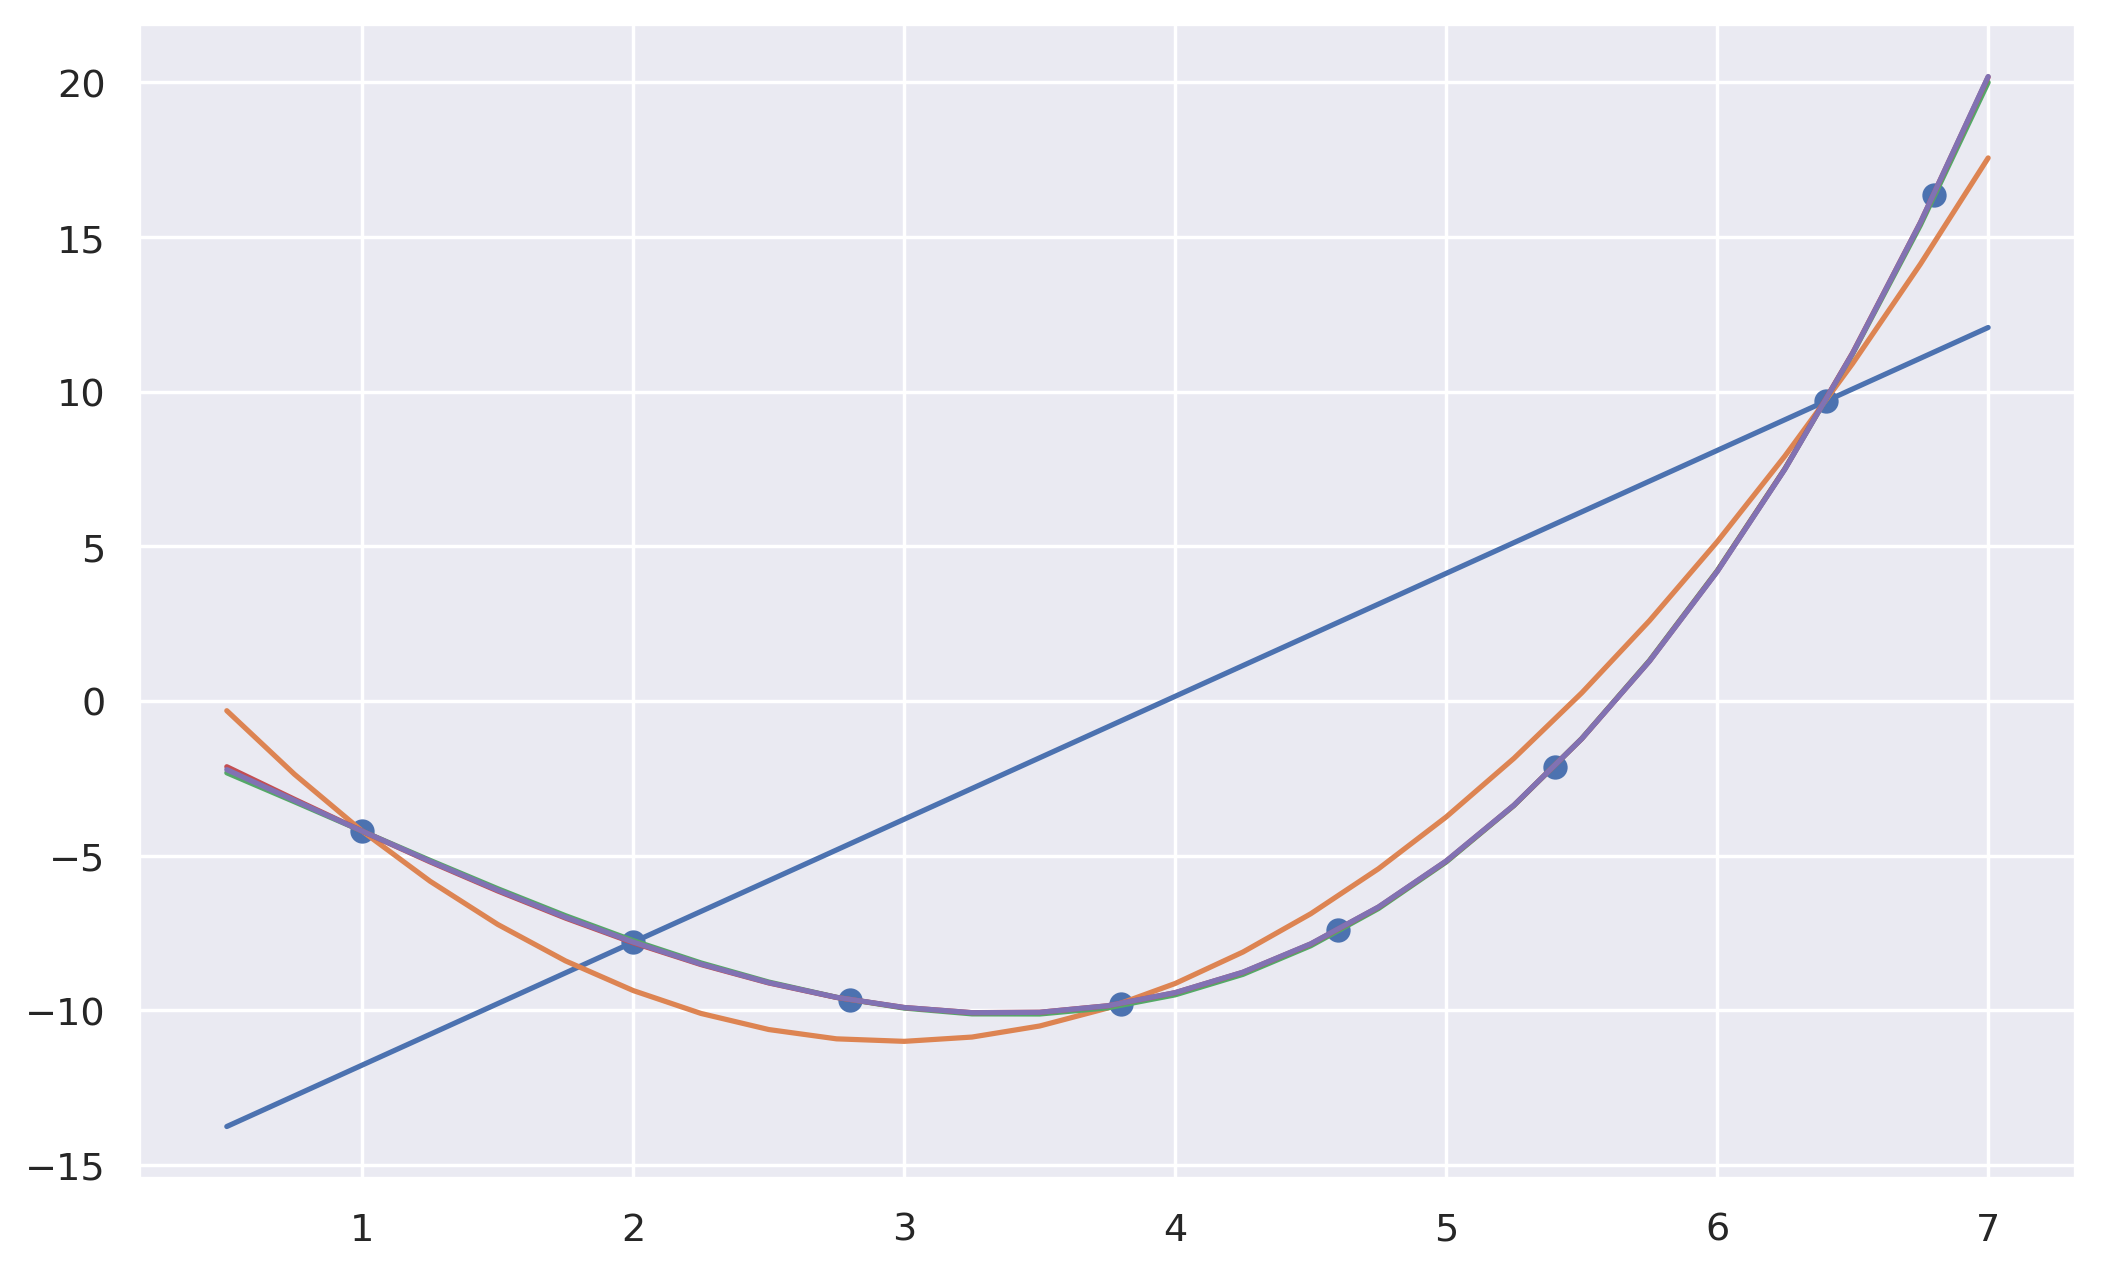

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6), dpi=250)
x = np.linspace(.5, 7, 27)

besterrors = []

for order, group in grouped_tuples.items():
    
    maxerrors = []

    for point_set in group:

        x_set, y_set = map(list, zip(*point_set))

        set_interpolation = lagrange_interpolation(x_set, y_set)

        unused_points = list(set(x_data) - set(x_set))

        errors = []

        for point in unused_points:
            
            error = remainder(point, x_set)
                        
            errors.append(error)
        
        maxerror = max(errors, key=abs)

        maxerrors.append(maxerror)
    
    best_error = min(maxerrors, key=abs)

    besterrors.append(best_error)

    best_nodes = group[maxerrors.index(min(maxerrors))]

    #print(best_nodes)

    best_x, best_y = zip(*best_nodes)
    print(best_x)

    best_interpolation = lagrange_interpolation(best_x, best_y)

    y = best_interpolation(x)

    plt.plot(x,y)


plt.scatter(x_data, y_data)
plt.show()
